Evaluation Project - 7
Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv


In [3]:
# import libraries
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [4]:
data=pd.read_csv('cusuomer_churn.csv')

In [5]:
df=pd.DataFrame(data)


In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.shape

(7043, 21)

the data set has 7043 rows and 21 variables

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

there are 21 variable or the features out of which churn is the target rest are the input 

In [9]:
# know what are the datatypes used in dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

in this data there is only 1 float, 2 integer type data and rest 18 variables are of Object datatype



In [11]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1414,5302-BDJNT,Male,0,No,No,35,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,Month-to-month,No,Electronic check,95.50,3418.2,No
1973,9675-ICXCT,Male,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,80.80,5728.55,No
5084,8966-OIQHG,Female,0,Yes,Yes,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.75,452.35,No
4541,9058-CBREO,Female,1,No,No,1,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,50.55,50.55,Yes
4720,8979-CAMGB,Male,1,No,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,102.10,6688.1,No


<AxesSubplot:xlabel='Churn', ylabel='count'>

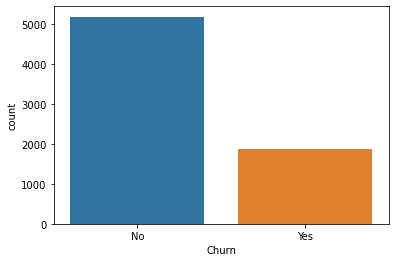

In [12]:
sns.countplot(df["Churn"])

In [13]:
df['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

The target variable 'Churn' tells us about whether the customer is retained or not, from the above data and plot we can observe that in the dataset 1869 customers are retained and 5174 customers are not retained, we can tell that attrition rate of this dataset is less



In [14]:
df['customerID'].unique


<bound method Series.unique of 0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object>

We can observe that all the 7043 instances of the data set has 7043 different customer IDs, this variable will not make any major impact on target varoable so it is good to drop this varible now



In [15]:
df.drop(['customerID'],axis=1,inplace=True)
df.shape


(7043, 20)

<AxesSubplot:xlabel='gender', ylabel='count'>

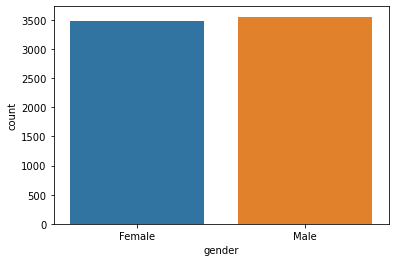

In [16]:
sns.countplot(df['gender'])


We can observe that there are almost equal number of male and female customers in the given dataset



<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

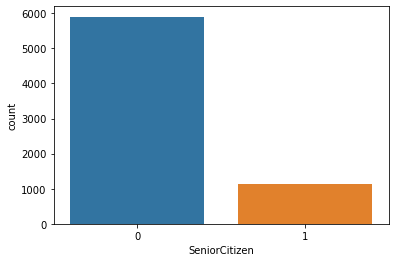

In [18]:
sns.countplot(df['SeniorCitizen'])


from the above plot it is clear that only 1000 around customers are Senior citizens and rest are non seniorcitizens



<AxesSubplot:xlabel='Partner', ylabel='count'>

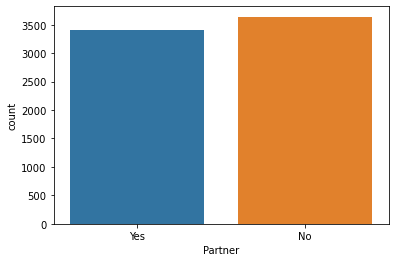

In [20]:
sns.countplot(df['Partner'])


This variable tells us about whether the customner is the company's partner or not, we can observe that almost 3500 customers are not partners with the company



<AxesSubplot:xlabel='Dependents', ylabel='count'>

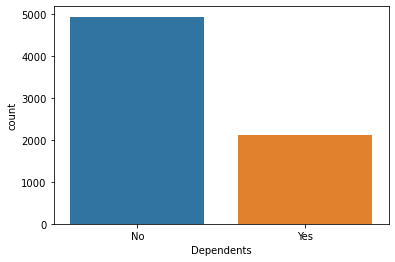

In [21]:
sns.countplot(df['Dependents'])


This variable tells us about whether the customer has dependents or not, We can observe that only 2000 around customers have dependents and rest don't have any dependents



<AxesSubplot:xlabel='tenure', ylabel='Count'>

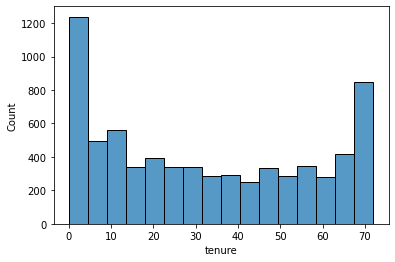

In [22]:
sns.histplot(df['tenure'])


The variable data tells us about how many months tenure customer picked, we can observe that almost 1200 customers picked the tenure of 5 and 800 of 70



<AxesSubplot:xlabel='PhoneService', ylabel='count'>

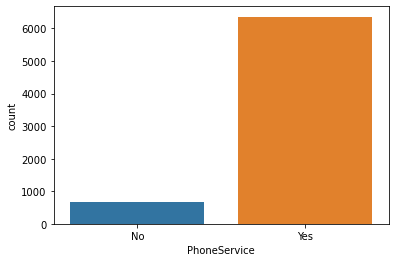

In [24]:
sns.countplot(df['PhoneService'])


This variable is about whether the customer has phone service or not, almost more than 6000 customers have phone services as we can see in the above plot



<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

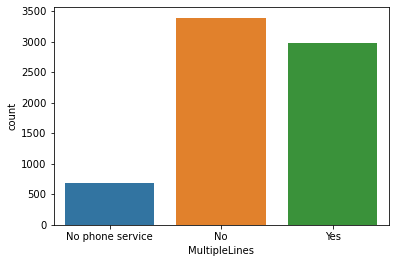

In [25]:
sns.countplot(df['MultipleLines'])


The above variable tells us about whether the customer have MultipleLines to connect or not, also it tells about whether customer have phone service, In the same way other columns like InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies,PaperlessBilling variables tells us about whether the customer have access to those features or not



<AxesSubplot:xlabel='Contract', ylabel='count'>

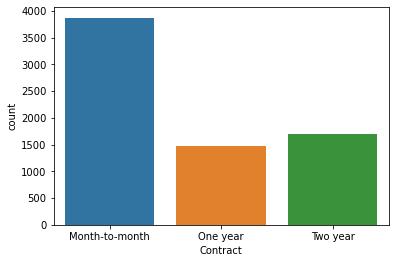

In [26]:
sns.countplot(df['Contract'])


This variables gives us details about how many months or years contract customer have taken us, we can observe that maximum number of customers have taken Month-to-month contract



<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

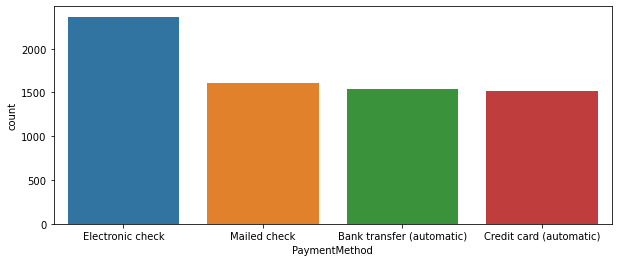

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(df['PaymentMethod'])


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

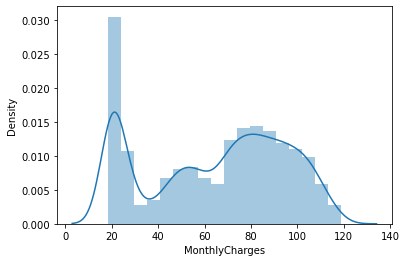

In [28]:
sns.distplot(df['MonthlyCharges'])


<AxesSubplot:xlabel='count', ylabel='gender'>

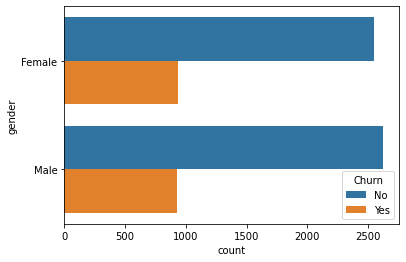

In [29]:
sns.countplot(data=df, y="gender", hue="Churn")


this gives the count of male and female who are churned

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

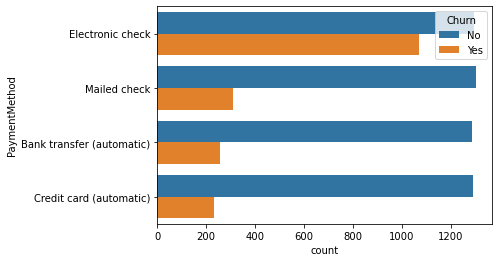

In [30]:
sns.countplot(data=df, y="PaymentMethod", hue="Churn")


this shows the different payment mode used to churn

<AxesSubplot:xlabel='count', ylabel='MultipleLines'>

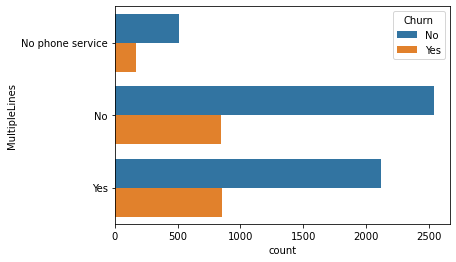

In [31]:
sns.countplot(data=df, y="MultipleLines", hue="Churn")


this shows those who have the phone service 

<AxesSubplot:xlabel='count', ylabel='SeniorCitizen'>

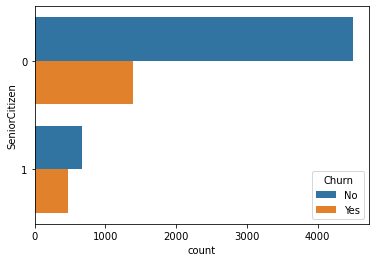

In [32]:
sns.countplot(data=df, y="SeniorCitizen", hue="Churn")


this shows about the senior citizen count 

<AxesSubplot:>

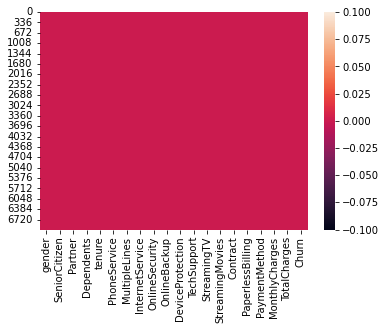

In [33]:
sns.heatmap(df.isnull())


in this heatmap We can observe that there is no missing values present in the data



In [35]:
Obj_columns=df.select_dtypes(include=[object])
Obj_columns.head(2)


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [37]:
for columns in Obj_columns:
    df[columns] = le.fit_transform(df[columns])


In [38]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

in this we see that all datatypes are int and only one float

In [40]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


oservation:

-Mean > 50th percentile in case of tenure and Churn we can expect these data to be skewed

-In the column tenure, MonthlyCharges, TotalCharges there is huge gap between 75th percentile and max hence outliers are present in those columns


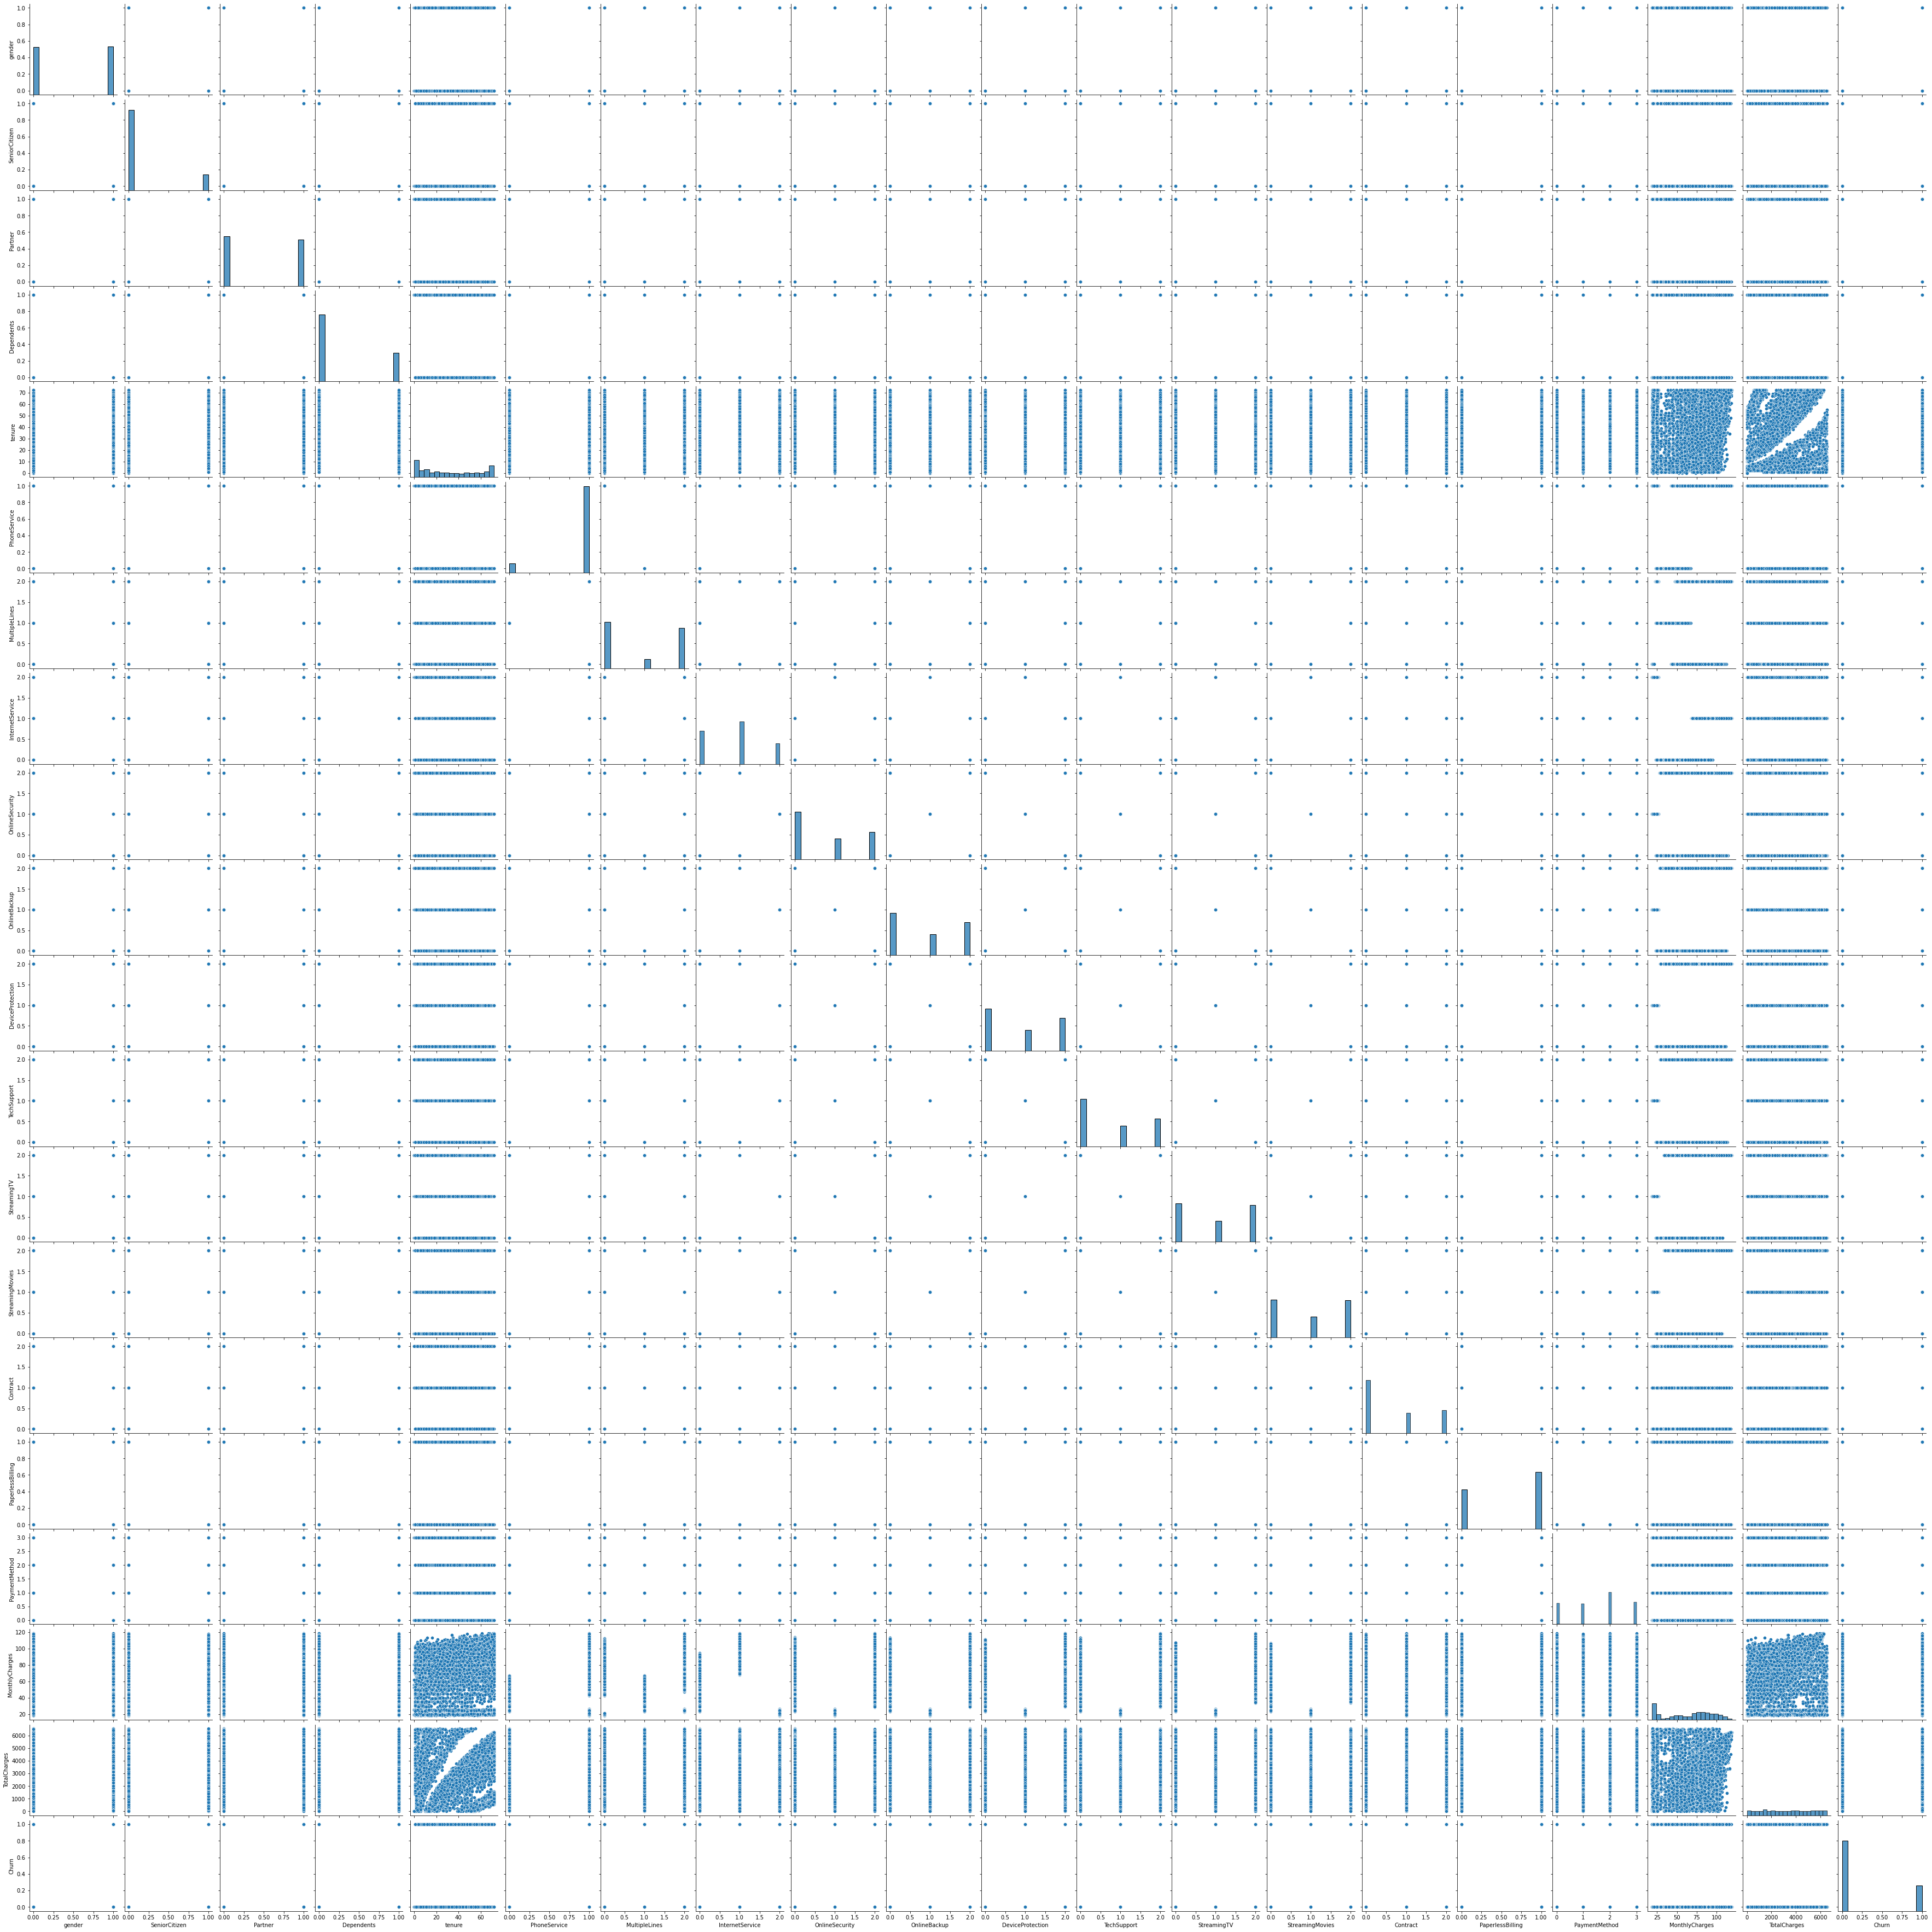

In [41]:
sns.pairplot(df)


In [42]:
df.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

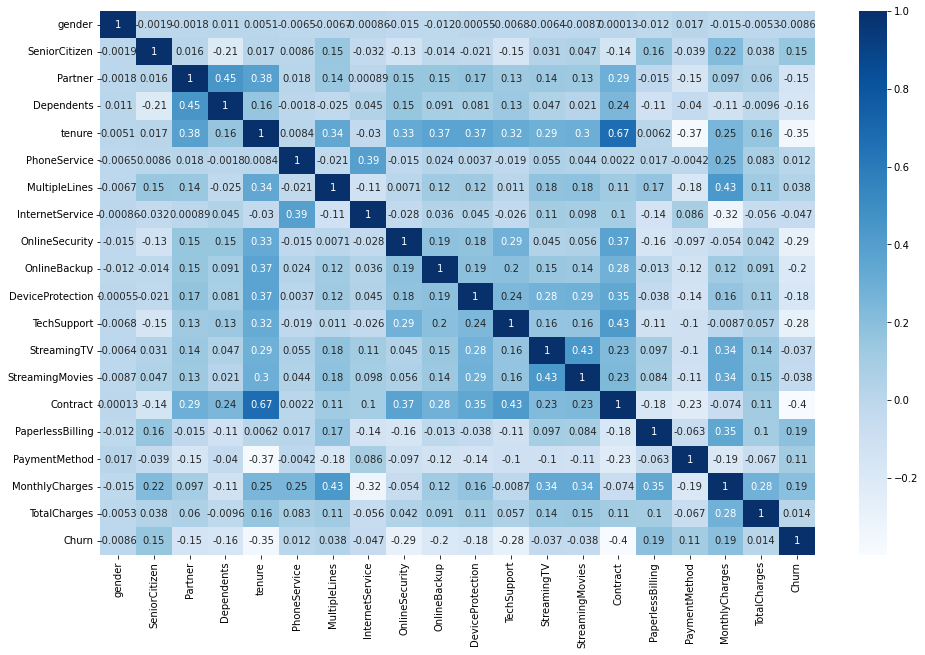

In [43]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)


oservation:

Churn has good correlationw ith variables like MonthlyCharges, PaperlessBilling, SeniorCitizen

Churn has negative correlation with variables like Contract, StreamingMovies, StreamingTV, DeviceProtection and other categorical data

We can also observe that partner and Dependents have good correlation
StreamingTV and StreamingMovies have good correlation


gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

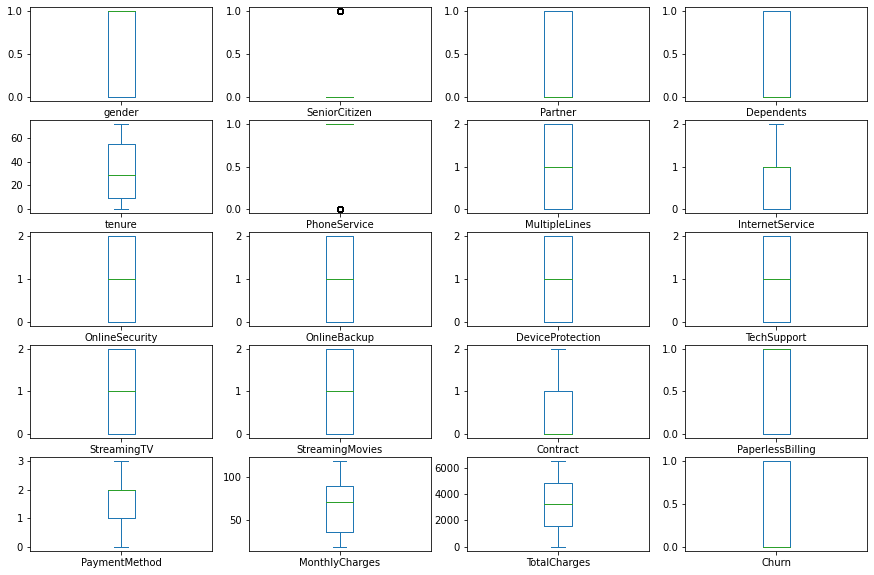

In [44]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,10))


In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.009559,0.439916,1.034530,0.654012,1.277445,3.054010,0.062723,1.183234,0.918838,1.242550,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.160323,0.398608,0.601023
1,0.990532,0.439916,0.966622,0.654012,0.066327,0.327438,0.991588,1.183234,1.407321,1.029919,1.245111,0.925262,1.113495,1.121405,0.371271,1.205113,1.334863,0.259629,0.948762,0.601023
2,0.990532,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,1.183234,1.407321,1.242550,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.362660,1.641883,1.663829
3,0.990532,0.439916,0.966622,0.654012,0.514251,3.054010,0.062723,1.183234,1.407321,1.029919,1.245111,1.396299,1.113495,1.121405,0.371271,1.205113,1.474052,0.746535,0.983710,0.601023
4,1.009559,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,0.172250,0.918838,1.029919,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,0.197365,1.235224,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,0.439916,1.034530,1.529024,0.340876,0.327438,1.117034,1.183234,1.407321,1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.879397,0.601023
7039,1.009559,0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,0.918838,1.242550,1.245111,0.925262,1.146547,1.138411,0.371271,0.829798,0.537747,1.277533,1.292099,0.601023
7040,1.009559,0.439916,1.034530,1.529024,0.870241,3.054010,0.062723,1.183234,1.407321,1.029919,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.168632,0.139680,0.601023
7041,0.990532,2.273159,1.034530,0.654012,1.155283,0.327438,1.117034,0.172250,0.918838,1.029919,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.320338,0.316534,1.663829


In [46]:
Threshold=3
print(np.where(z>3))


(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [47]:
df_new=df[(z<3)]
df_new


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,NaN,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1.0,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1.0,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,NaN,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1.0,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1.0,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1.0,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,NaN,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1.0,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [48]:
df.shape


(7043, 20)

In [49]:
df_new.shape


(7043, 20)

We can observe that both df and df_new data to have same size as there was no outliers present in the data



In [50]:
df.skew()


gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

We can see that there is no much skewness present in the dataset

We can now check for multicolinearity



In [51]:
x=df.drop(['Churn'],axis=1)
x.sample()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4013,0,0,0,0,2,1,2,0,0,0,0,2,0,0,0,1,3,54.35,315


In [52]:
y=df['Churn']
y


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [53]:
y.shape,x.shape


((7043,), (7043, 19))

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [55]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)


In [56]:
vif_calc()


    VIF Factor          Features
0     1.930602            gender
1     1.366680     SeniorCitizen
2     2.820768           Partner
3     1.953659        Dependents
4     7.476538            tenure
5    14.252701      PhoneService
6     2.753961     MultipleLines
7     4.327149   InternetService
8     2.252831    OnlineSecurity
9     2.436458      OnlineBackup
10    2.624311  DeviceProtection
11    2.383508       TechSupport
12    3.231959       StreamingTV
13    3.256444   StreamingMovies
14    4.171558          Contract
15    2.831252  PaperlessBilling
16    2.959580     PaymentMethod
17   15.539771    MonthlyCharges
18    4.247034      TotalCharges


We can see that monthly charges and PhoneServices are creating multicollinearity, as we can observe that Phoneservices is giving only 0.012 contribution to target variable and monthlyCharges have 0.19 correlation with target variable we can drop PhoneService in thsi case



In [57]:
x = x.drop(["PhoneService"],axis=1)
x.shape


(7043, 18)

In [58]:
vif_calc()


    VIF Factor          Features
0     1.914439            gender
1     1.364286     SeniorCitizen
2     2.819594           Partner
3     1.945020        Dependents
4     7.476344            tenure
5     2.676792     MultipleLines
6     2.433705   InternetService
7     2.233165    OnlineSecurity
8     2.436125      OnlineBackup
9     2.618037  DeviceProtection
10    2.370197       TechSupport
11    3.149766       StreamingTV
12    3.174967   StreamingMovies
13    4.139468          Contract
14    2.830350  PaperlessBilling
15    2.806995     PaymentMethod
16    9.476845    MonthlyCharges
17    4.220489      TotalCharges


Hence multicollinearity is removed from the data



In [59]:
# Splitting the data for training and testing the model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)


In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((5282, 18), (1761, 18), (5282,), (1761,))

In [61]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()


In [63]:
model=[lg,gnb,svc,dtc,knn,rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is : ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')
    print("**********************************")


Accuracy score of  LogisticRegression() is : 
0.8029528676888131
[[1148  134]
 [ 213  266]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1282
           1       0.67      0.56      0.61       479

    accuracy                           0.80      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.79      0.80      0.80      1761



**********************************
Accuracy score of  GaussianNB() is : 
0.7535491198182851
[[965 317]
 [117 362]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1282
           1       0.53      0.76      0.63       479

    accuracy                           0.75      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.79      0.75      0.76      1761



**********************************
Accuracy score of  SVC() is : 
0.7279954571266326
[[1282    0]
 [ 479    0]]
              precision

Comparing all the models above we can see that LogisticRegressor is giving the best score of 80.23%



In [64]:
from sklearn.model_selection import cross_val_score


In [66]:
for m in model:
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Score of : ",m )
    print(score*100)
    print(score.mean()*100)
    print(score.std()*100)
    print('\n')
    print("++++++++++++++++++++++++++++++++++++++++++++")

Score of :  LogisticRegression()
[80.98391675 78.9025544  79.0719697  77.36742424 79.54545455]
79.17426392591955
1.1628917078976073


++++++++++++++++++++++++++++++++++++++++++++
Score of :  GaussianNB()
[76.72658467 75.49668874 75.18939394 73.29545455 76.13636364]
75.3688971073077
1.1644772687622282


++++++++++++++++++++++++++++++++++++++++++++
Score of :  SVC()
[73.69914853 73.69914853 73.67424242 73.67424242 73.67424242]
73.6842048679797
0.012201451873762639


++++++++++++++++++++++++++++++++++++++++++++
Score of :  DecisionTreeClassifier()
[73.60454115 72.4692526  73.10606061 73.20075758 72.53787879]
72.98369814512199
0.42683545462970945


++++++++++++++++++++++++++++++++++++++++++++
Score of :  KNeighborsClassifier()
[75.59129612 74.55061495 74.90530303 73.39015152 75.56818182]
74.80110948653996
0.8095926240827165


++++++++++++++++++++++++++++++++++++++++++++
Score of :  RandomForestClassifier()
[80.41627247 79.56480605 78.03030303 78.50378788 77.93560606]
78.89015509876437
0.95

Even which CV we can see that LogisticRegressor is giving best mean score



In [67]:
#parameter tuning for Logistic Regression

lg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lg, param_grid=grid)


In [68]:
grid_result = grid_search.fit(x_train, y_train)


In [69]:
grid_result.best_score_


0.7998833534015652

In [70]:
grid_result.best_params_


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [71]:
# parameter tuning for RandomForestClassifier()

rf=RandomForestClassifier()
params={'criterion':['gini','entropy','log_loss']}
grd=GridSearchCV(estimator=rf,param_grid=params,cv=5)
grd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [72]:
grd.best_score_


0.7889019093489292

In [73]:
grd.best_params_


{'criterion': 'gini'}

As the LogisticRegression with default values was giving best results compared to other models we can finalize that as our final model



In [74]:
final_model=LogisticRegression()
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


80.29528676888131
[[1148  134]
 [ 213  266]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1282
           1       0.67      0.56      0.61       479

    accuracy                           0.80      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.79      0.80      0.80      1761



In [75]:
# We can save the model now
import joblib
joblib.dump(final_model,'Customer_Churn_Prediction.obj')


['Customer_Churn_Prediction.obj']

In [76]:
#Loading the saved model and predicting the values

Customer_Churn=joblib.load('Customer_Churn_Prediction.obj')


In [77]:
pred=Customer_Churn.predict(x_test)
print("Predicted values :",pred)


Predicted values : [1 0 0 ... 0 1 0]


In [78]:
y_test


185     1
2715    0
3825    0
1807    1
132     0
       ..
5845    1
2301    0
5121    0
677     1
6062    0
Name: Churn, Length: 1761, dtype: int32

In [79]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred,'Original values':y_test})
df1


,Predicted values,Original values
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
...,...,...
5845,1,1
2301,1,0
5121,0,0
677,1,1


we can observe that the original values and predicted values are almost same and the model is working 80.2% accurate

completed the model